**Load the Dataset**

In [13]:
import pandas as pd

# Load the dataset
file_path = "Project_FL/Structured/heart.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Inspect the dataset
print(df.head())
print(df.info())
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

**Handle Missing Values**

In [14]:

# Replace missing values for numerical columns
df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)  # Resting blood pressure
df['chol'].fillna(df['chol'].median(), inplace=True)        # Serum cholesterol

# Replace missing values for categorical column
df['thal'].fillna("Unknown", inplace=True)  # Categorical data handling for 'thal'

# Check for missing values after handling
print("\nMissing values per column (after handling):")
print(df.isnull().sum())


Missing values per column (after handling):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Encode Categorical Variables**

In [16]:
# Check if 'thal' has been one-hot encoded (i.e., check if 'thal_1', 'thal_2', 'thal_3' exist)
thal_columns = ['thal_1', 'thal_2', 'thal_3']

# If these columns don't exist, apply one-hot encoding
if not all(col in df.columns for col in thal_columns):
    df = pd.get_dummies(df, columns=['thal'], prefix='thal', drop_first=True)

# Label encode 'cp' (chest pain type) - only once.
# Ensure 'cp' is not null before applying the mapping
if df['cp'].isnull().sum() > 0:
    df['cp'].fillna('Unknown', inplace=True)

chest_pain_mapping = {
    'typical angina': 0,
    'atypical angina': 1,
    'non-anginal pain': 2,
    'asymptomatic': 3,
    'Unknown': -1  # In case we had to fill missing values
}

df['cp'] = df['cp'].map(chest_pain_mapping)

# Verify the changes
print("Encoded DataFrame:")
print(df.head())

# Print the column names to verify
print(df.columns)

Encoded DataFrame:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1  -1       125   212    0        1      168      0      1.0      2   
1   53    1  -1       140   203    1        0      155      1      3.1      0   
2   70    1  -1       145   174    0        1      125      1      2.6      0   
3   61    1  -1       148   203    0        1      161      0      0.0      2   
4   62    0  -1       138   294    1        1      106      0      1.9      1   

   ca  target  thal_1  thal_2  thal_3  
0   2       0   False   False    True  
1   0       0   False   False    True  
2   0       0   False   False    True  
3   1       0   False   False    True  
4   3       0   False    True   False  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'target', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')


C:\Users\91979\AppData\Local\Temp\ipykernel_23236\1236385342.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['cp'].fillna('Unknown', inplace=True)


**Normalize Numerical Features**

In [18]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns (updated to match your dataset column names)
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the scaled data
print("\nScaled DataFrame:")
print(df.head())


Scaled DataFrame:
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167    1  -1  0.292453  0.196347    0        1  0.740458      0   
1  0.500000    1  -1  0.433962  0.175799    1        0  0.641221      1   
2  0.854167    1  -1  0.481132  0.109589    0        1  0.412214      1   
3  0.666667    1  -1  0.509434  0.175799    0        1  0.687023      0   
4  0.687500    0  -1  0.415094  0.383562    1        1  0.267176      0   

    oldpeak  slope  ca  target  thal_1  thal_2  thal_3  
0  0.161290      2   2       0   False   False    True  
1  0.500000      0   0       0   False   False    True  
2  0.419355      0   0       0   False   False    True  
3  0.000000      2   1       0   False   False    True  
4  0.306452      1   3       0   False    True   False  


**Handle Outliers**

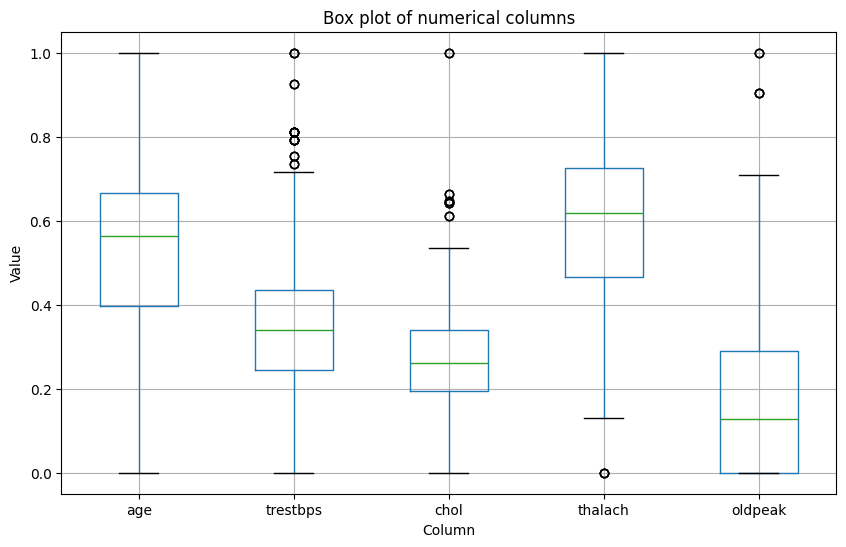

In [19]:
# Visualize the outliers with box plot
import matplotlib.pyplot as plt

# Select the numerical columns to plot
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a box plot for each numerical column
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title("Box plot of numerical columns")
plt.ylabel("Value")
plt.xlabel("Column")
plt.show()

In [20]:
# Detect and remove outliers using IQR for 'trestbps' (resting blood pressure)
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



**Create Target Variable**

In [21]:
# Assume 'target' is the column indicating heart disease presence
X = df.drop('target', axis=1)  # Features
y = df['target']              # Target


**Validate the Dataset**

In [114]:
# Verify the changes using head and info
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

# Check for balanced classes in the target variable
print("\nClass distribution in the target variable:")
print(df['target'].value_counts())


First 5 rows of the DataFrame:
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167    1  -1  0.292453  0.196347    0        1  0.740458      0   
1  0.500000    1  -1  0.433962  0.175799    1        0  0.641221      1   
2  0.854167    1  -1  0.481132  0.109589    0        1  0.412214      1   
3  0.666667    1  -1  0.509434  0.175799    0        1  0.687023      0   
4  0.687500    0  -1  0.415094  0.383562    1        1  0.267176      0   

    oldpeak  slope  ca  target  thal_1  thal_2  thal_3  
0  0.161290      2   2       0   False   False    True  
1  0.500000      0   0       0   False   False    True  
2  0.419355      0   0       0   False   False    True  
3  0.000000      2   1       0   False   False    True  
4  0.306452      1   3       0   False    True   False  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------  

**Save the Preprocessed Dataset**

In [22]:
# Save the preprocessed dataset
df.to_csv("preprocessed_heart_disease_dataset.csv", index=False)


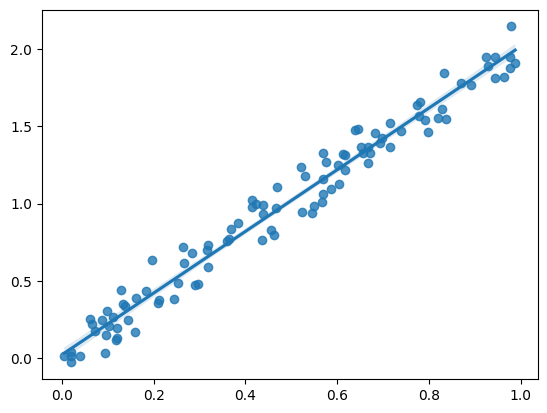

In [100]:
# Create a random regplot to understand collinearity
# Create random data
import numpy as np
np.random.seed(0)
x = np.random.rand(100)
y = 2 * x + np.random.normal(0, 0.1, 100)

# Cretae regplot
import seaborn as sns
sns.regplot(x=x, y=y)
plt.show()


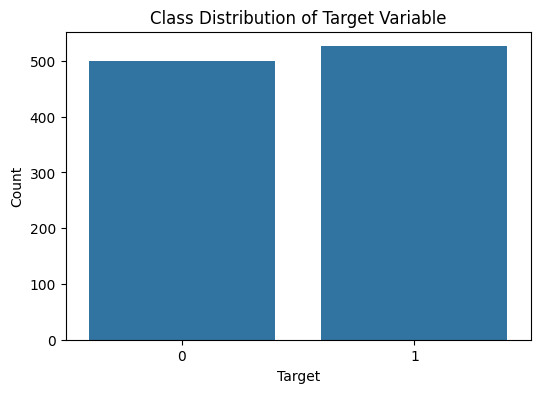

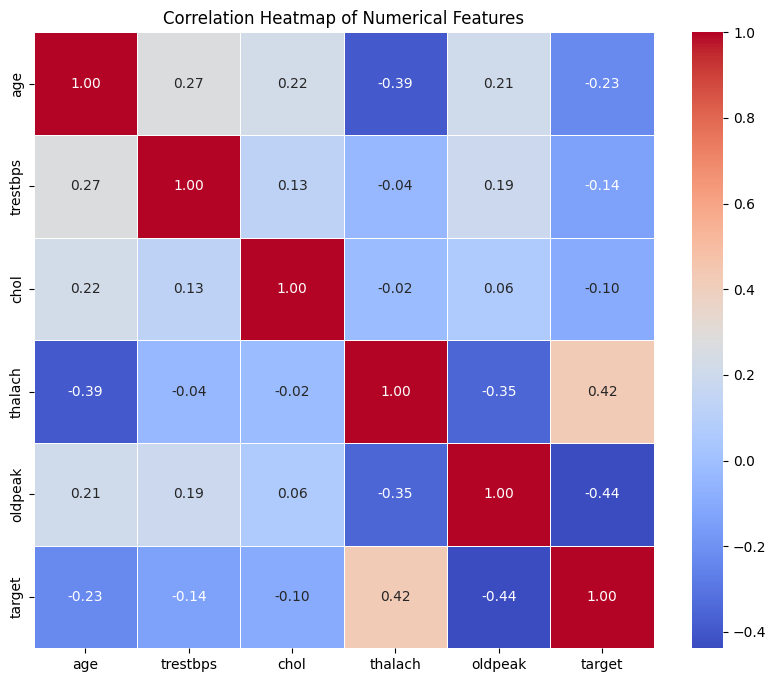

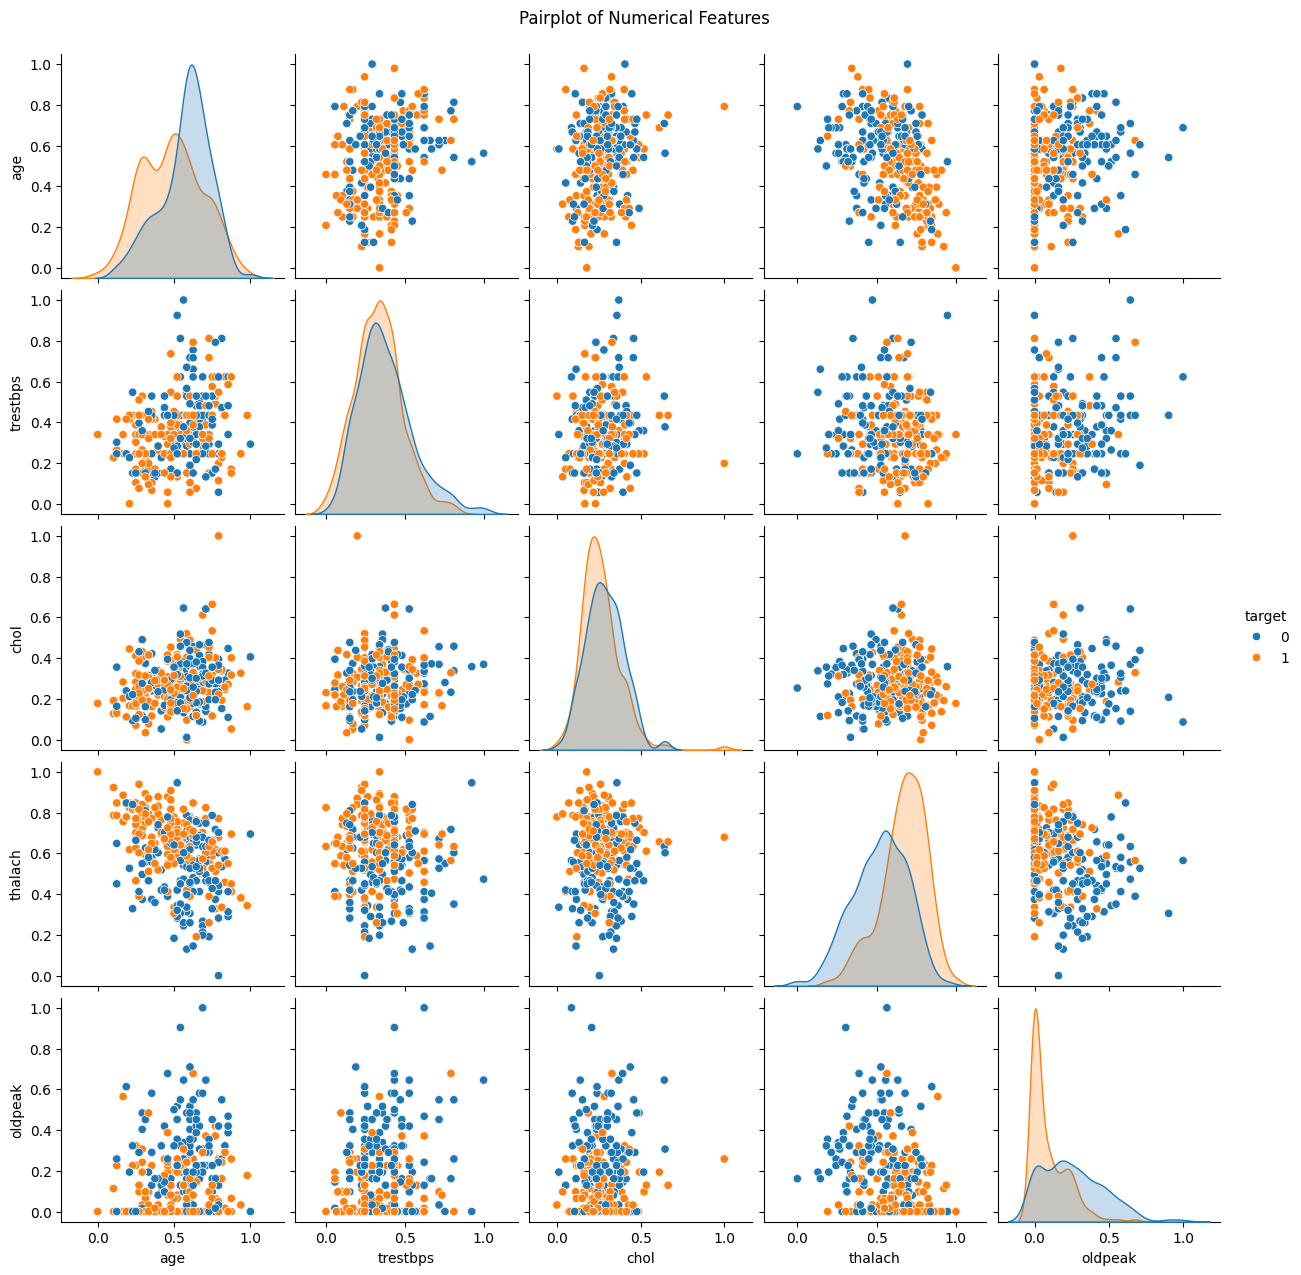

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Class Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Class Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# 2. Correlation Heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols + ['target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 3. Pairplot to show pairwise relationships between numerical features
sns.pairplot(df[numerical_cols + ['target']], hue='target', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X = df.drop(columns='target')  # Assuming 'target' is the column for heart disease prediction
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

